# Expectation-Maximization (EM)

### É proposto o uso do algoritmo EM para o agrupamento de dados bidimensionais (2D)

### Bibliotecas a serem utilizadas

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
np.random.seed(0)

C:\Users\gustavo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Base de dados a ser analisada é gerada por meio de amostragens de distribuições probabilísticas

In [2]:
# Criação do dataset
X,Y = make_blobs(cluster_std=1.5, random_state=20, n_samples=500, centers=2)
# Esticar datasets de forma a gerar dados elipsóides
X = np.dot(X, np.random.randn(2,2))

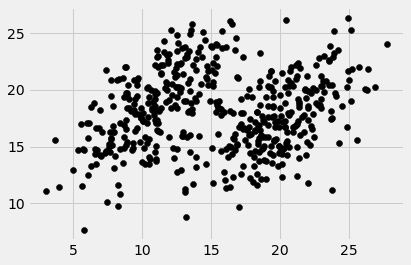

In [3]:
plt.scatter(X[:,0],X[:,1], c = 'k')
plt.show()

### Algoritmo EM

In [4]:
class GMM:
    def __init__(self, X, number_of_sources, iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None

    # Função que roda o algoritmo
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]), np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(), y.flatten()]).T

    # Definir valores iniciais para mu, covariância e valores de pi 
        self.mu = np.random.randint(min(self.X[:,0]), max(self.X[:,0]), size=(self.number_of_sources,len(self.X[0]))) # retorna matriz 3x2
        self.cov = np.zeros((self.number_of_sources, len(X[0]), len(X[0])))
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim], 5)
        self.pi = np.ones(self.number_of_sources)/self.number_of_sources
        log_likelihoods = [] # Lista para armazenar valores de verossimilhança em cada iteração

        # Plot dos estados iniciais
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0], self.X[:,1])
        ax0.set_title('Initial State')
        for m, c in zip(self.mu, self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m, cov=c)
            ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        plt.show()

        for i in range(self.iterations):

            # E-Step
            # Contabilizar a probabilidade de cada ponto pertencer a cada cluster
            r_ic = np.zeros((len(self.X),len(self.cov)))
            for m, co, p, r in zip(self.mu, self.cov, self.pi, range(len(r_ic[0]))):
                co += self.reg_cov
                mn = multivariate_normal(mean=m, cov=co)
                r_ic[:, r] = p*mn.pdf(self.X) / np.sum([pi_c*multivariate_normal(mean=mu_c, cov=cov_c).pdf(self.X)
                                                for pi_c, mu_c, cov_c in zip(self.pi, self.mu, self.cov+self.reg_cov)], axis=0)
            # M-Step
            # Atualizar os valores de mu, cov e pi de acordo o cálculo de r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            for c in range(len(r_ic[0])):
                # mu
                m_c = np.sum(r_ic[:,c], axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1), axis=0)
                self.mu.append(mu_c)
                # cov
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,
                                                                                (self.X-mu_c)))+self.reg_cov)
                # pi
                self.pi.append(m_c/np.sum(r_ic))

            # Log Likelihood
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(self.X) for k,i,j in 
                                                                        zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
           
        
        # Plot do Likelihood (Verossimilhança)
        fig2 = plt.figure(figsize=(10,10))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        plt.show()
    
    # Função para prever a qual cluster um ponto pertence
    def predict(self,Y):
        
        # Plot do estado final após todas as iterações
        fig3 = plt.figure(figsize=(10,10))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
                
        # Prediction
        prediction = []        
        for m,c in zip(self.mu,self.cov):
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        plt.show()
        return prediction

### Main()

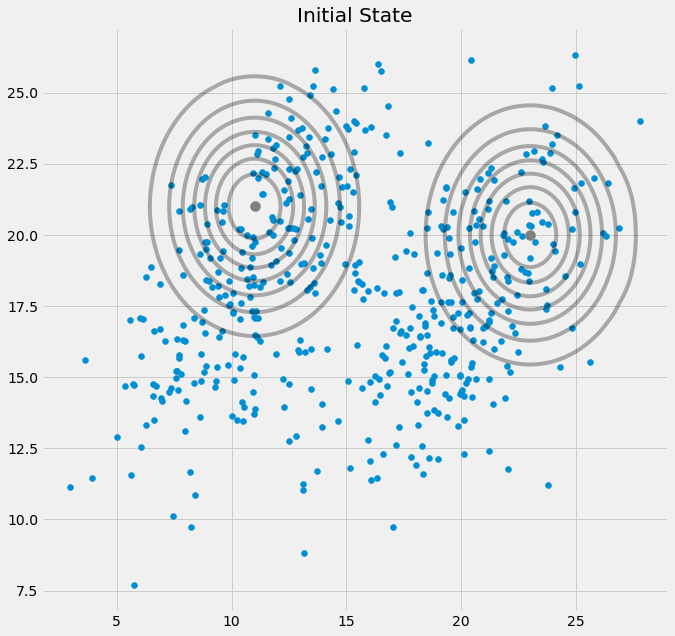

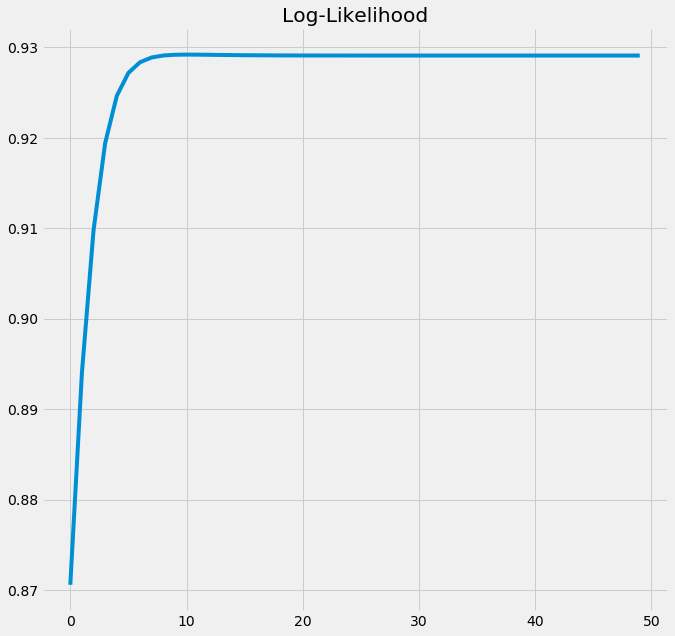

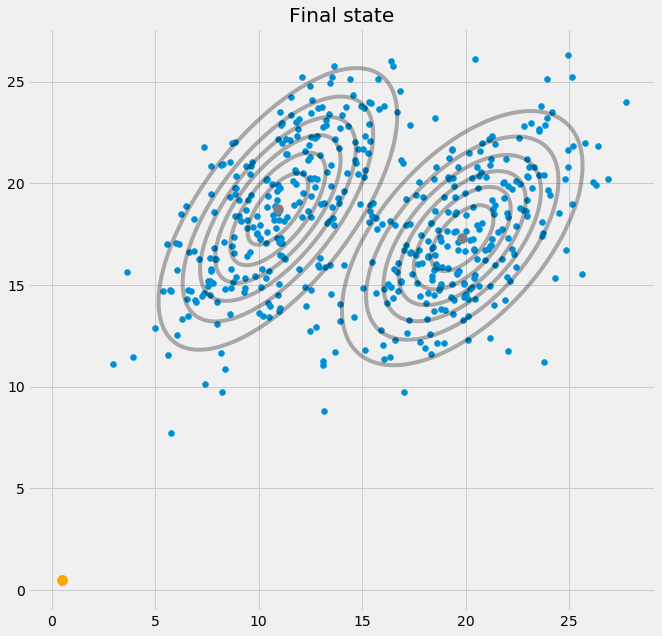

[0.9999423962936702, 5.7603706329785395e-05]


In [5]:
GMM = GMM(X,2,50)     
GMM.run()
print(GMM.predict([[0.5,0.5]]))